# AI vs Human Content Detection - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the AI vs Human content detection dataset.

## Dataset Overview
- **File**: `data/raw/ai_human_content_detection_dataset.csv`
- **Task**: Binary classification (AI-generated vs Human-written)
- **Features**: Text content + multiple linguistic/stylometric features

## 1. Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src to path for our custom modules
sys.path.append('../../src')

# Set style and suppress warnings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [2]:
# Load the dataset
data_path = '../../data/raw/ai_human_content_detection_dataset.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (1367, 17)
Columns: ['text_content', 'content_type', 'word_count', 'character_count', 'sentence_count', 'lexical_diversity', 'avg_sentence_length', 'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio', 'predictability_score', 'burstiness', 'sentiment_score', 'label']


## 3. Basic Dataset Information

In [3]:
# Basic info
print("=== DATASET OVERVIEW ===")
print(f"Number of samples: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== COLUMN INFORMATION ===")
df.info()

=== DATASET OVERVIEW ===
Number of samples: 1,367
Number of features: 17
Memory usage: 1.52 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  

In [4]:
# First few rows
print("=== FIRST 5 ROWS ===")
df.head()

=== FIRST 5 ROWS ===


text_content  \
0  Score each cause. Quality throughout beautiful instead.\nDespite measure ago current.\nDetermine...   
1  Board its rock. Job worker break tonight couple and.\nMind southern rather. Hair attorney profes...   
2  Way debate decision produce. Dream necessary choose impact. Like allow explain executive teacher...   
3  Story turn because such during open model. That second develop single baby plan. Member town gla...   
4  Place specific as simply leader fall analysis. Though firm financial huge spring. Education send...   

       content_type  word_count  character_count  sentence_count  \
0    academic_paper         288             1927              54   
1             essay         253             1719              45   
2    academic_paper         420             2849              75   
3  creative_writing         196             1310              34   
4      news_article         160             1115              28   

   lexical_diversity  avg_sentence_length  avg_word_length  punctuation_ratio  \
0             0.9514                 5.33             5.69             0.0280   
1             0.9723                 5.62             5.80             0.0262   
2             0.9071                 5.60             5.79             0.0263   
3             0.9592                 5.76             5.69             0.0260   
4             0.9688                 5.71             5.97             0.0251   

   flesch_reading_ease  gunning_fog_index  grammar_errors  \
0                53.08               7.41               1   
1                50.32               8.10               6   
2                46.86               7.86               5   
3                53.80               7.00               2   
4                44.53               8.29               0   

   passive_voice_ratio  predictability_score  burstiness  sentiment_score  \
0               0.1041                105.86      0.5531           0.2034   
1               0.2045                100.29      0.5643           0.4854   
2               0.2308                 96.88      0.4979          -0.2369   
3               0.1912                 88.79      0.6241              NaN   
4               0.1318                 26.15      0.2894              NaN   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

In [5]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
df.describe()

=== STATISTICAL SUMMARY ===


word_count  character_count  sentence_count  lexical_diversity  \
count  1367.000000      1367.000000     1367.000000        1367.000000   
mean    140.190929       940.329188       25.610095           0.967646   
std      97.410218       654.335255       17.867480           0.026254   
min       3.000000        14.000000        1.000000           0.875000   
25%      61.500000       410.500000       11.000000           0.951550   
50%     131.000000       882.000000       24.000000           0.969200   
75%     193.000000      1294.500000       35.000000           0.989100   
max     443.000000      2966.000000       83.000000           1.000000   

       avg_sentence_length  avg_word_length  punctuation_ratio  \
count          1367.000000      1367.000000        1367.000000   
mean              5.486423         5.717783           0.027440   
std               0.447202         0.279636           0.002801   
min               3.000000         4.000000           0.019400   
25%               5.270000         5.590000           0.026100   
50%               5.480000         5.710000           0.027200   
75%               5.700000         5.830000           0.028400   
max               8.000000         8.330000           0.071400   

       flesch_reading_ease  gunning_fog_index  grammar_errors  \
count          1288.000000        1332.000000     1367.000000   
mean             52.183377           7.556877        1.537674   
std              10.466570           1.866676        1.912012   
min             -50.010000           1.200000        0.000000   
25%              47.712500           6.620000        0.000000   
50%              52.190000           7.515000        1.000000   
75%              57.322500           8.390000        3.000000   
max              98.870000          27.870000       10.000000   

       passive_voice_ratio  predictability_score   burstiness  \
count          1336.000000           1367.000000  1367.000000   
mean              0.150198             62.779049     0.427041   
std               0.056738             28.223550     0.199249   
min               0.050000             20.030000     0.101100   
25%               0.099675             39.015000     0.250000   
50%               0.151350             56.820000     0.408500   
75%               0.200150             86.645000     0.594300   
max               0.250000            119.930000     0.799500   

       sentiment_score        label  
count      1313.000000  1367.000000  
mean         -0.007997     0.499634  
std           0.588354     0.500183  
min          -0.999300     0.000000  
25%          -0.525800     0.000000  
50%          -0.006200     0.000000  
75%           0.502800     1.000000  
max           0.995900     1.000000

## 4. Missing Values Analysis

=== MISSING VALUES ===
                     Missing Count  Missing Percentage
flesch_reading_ease             79            5.779078
sentiment_score                 54            3.950256
gunning_fog_index               35            2.560351
passive_voice_ratio             31            2.267740


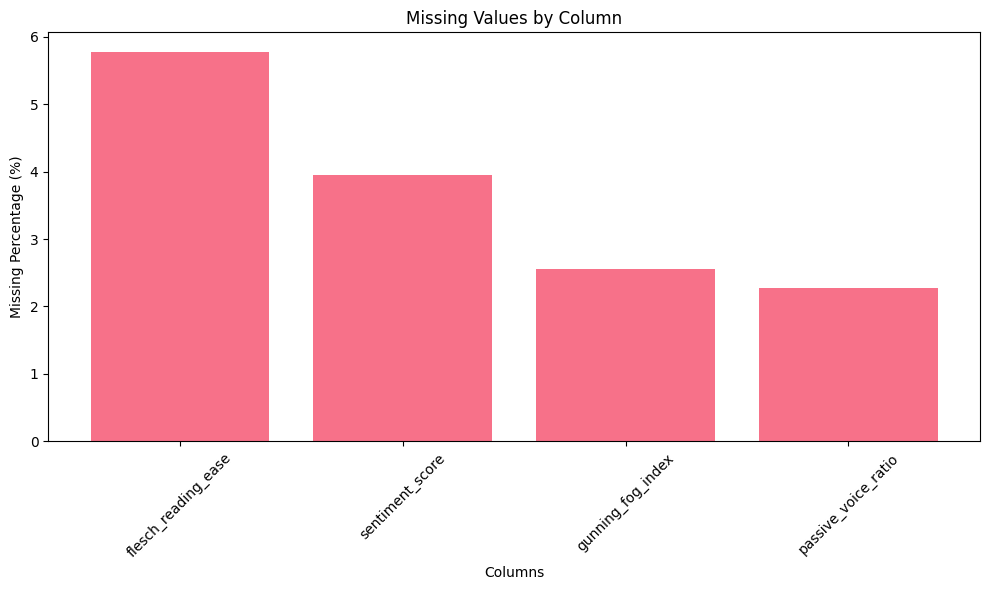

In [6]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("=== MISSING VALUES ===")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("‚úÖ No missing values found in the dataset!")
else:
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    if len(missing_cols) > 0:
        plt.bar(missing_cols.index, missing_cols['Missing Percentage'])
        plt.title('Missing Values by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

## 5. Target Variable Analysis

=== TARGET VARIABLE ANALYSIS ===

Label distribution:
label
0    684
1    683
Name: count, dtype: int64

Label percentages:
Human (0): 50.04%
AI-Generated (1): 49.96%


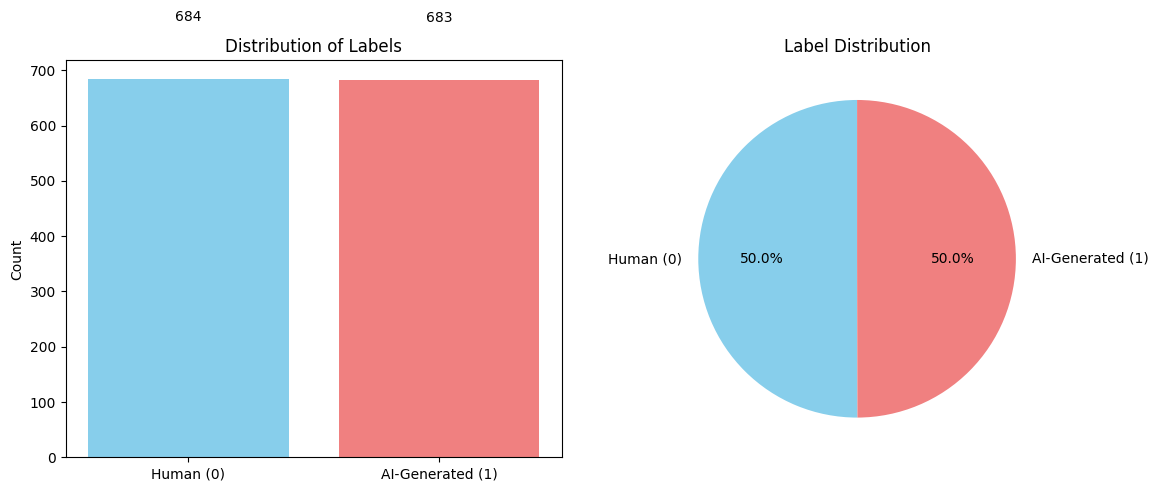


Dataset balance ratio: 0.999
‚úÖ Dataset is well balanced


In [7]:
# Analyze the target variable (label)
print("=== TARGET VARIABLE ANALYSIS ===")
print("\nLabel distribution:")
label_counts = df['label'].value_counts().sort_index()
print(label_counts)

print("\nLabel percentages:")
label_percentages = df['label'].value_counts(normalize=True).sort_index() * 100
for label, pct in label_percentages.items():
    label_name = "Human" if label == 0 else "AI-Generated"
    print(f"{label_name} ({label}): {pct:.2f}%")

# Visualize label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
labels = ['Human (0)', 'AI-Generated (1)']
colors = ['skyblue', 'lightcoral']
ax1.bar(labels, label_counts.values, color=colors)
ax1.set_title('Distribution of Labels')
ax1.set_ylabel('Count')
for i, v in enumerate(label_counts.values):
    ax1.text(i, v + 100, str(v), ha='center', va='bottom')

# Pie chart
ax2.pie(label_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Label Distribution')

plt.tight_layout()
plt.show()

# Check if dataset is balanced
balance_ratio = min(label_counts) / max(label_counts)
print(f"\nDataset balance ratio: {balance_ratio:.3f}")
if balance_ratio > 0.8:
    print("‚úÖ Dataset is well balanced")
elif balance_ratio > 0.5:
    print("‚ö†Ô∏è Dataset is moderately imbalanced")
else:
    print("‚ùå Dataset is highly imbalanced")

## 6. Text Content Analysis

=== TEXT CONTENT ANALYSIS ===

Text length statistics:
       count        mean         std   min     25%    50%     75%     max
label                                                                    
0      684.0  921.573099  635.120605  27.0  397.25  881.0  1279.0  2889.0
1      683.0  959.112738  672.970304  14.0  421.00  882.0  1301.5  2966.0


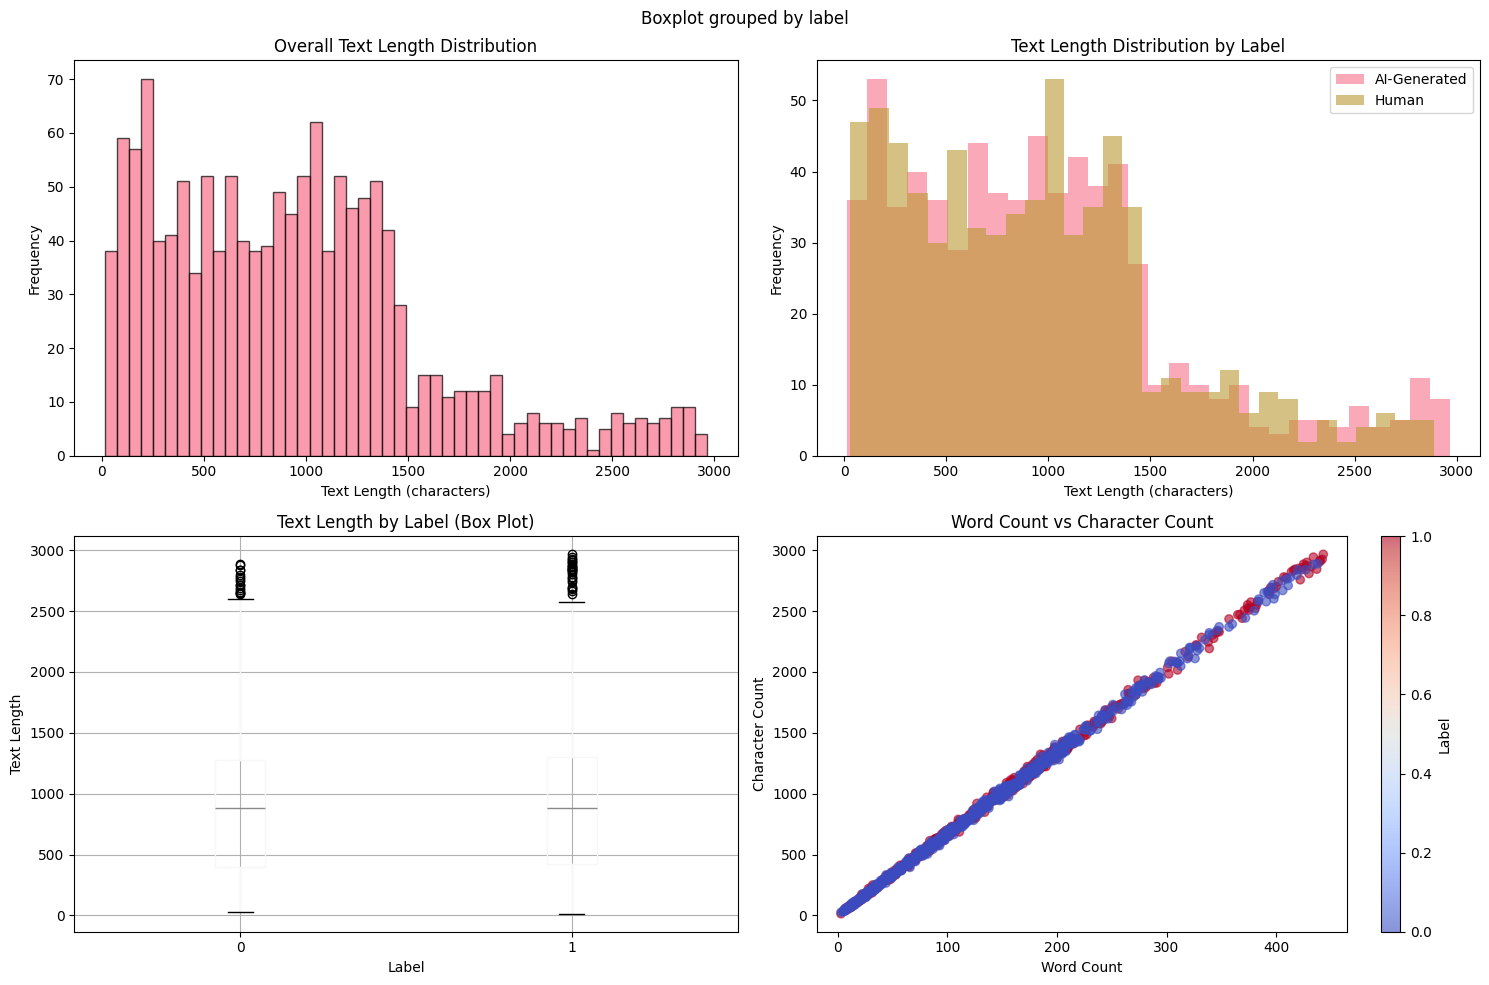

In [8]:
# Analyze text content lengths
print("=== TEXT CONTENT ANALYSIS ===")

# Calculate text lengths
df['text_length'] = df['text_content'].str.len()

print("\nText length statistics:")
print(df.groupby('label')['text_length'].describe())

# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall text length distribution
axes[0, 0].hist(df['text_length'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Overall Text Length Distribution')
axes[0, 0].set_xlabel('Text Length (characters)')
axes[0, 0].set_ylabel('Frequency')

# Text length by label
for label in df['label'].unique():
    label_name = "Human" if label == 0 else "AI-Generated"
    data = df[df['label'] == label]['text_length']
    axes[0, 1].hist(data, bins=30, alpha=0.6, label=label_name)
axes[0, 1].set_title('Text Length Distribution by Label')
axes[0, 1].set_xlabel('Text Length (characters)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Box plot comparison
df.boxplot(column='text_length', by='label', ax=axes[1, 0])
axes[1, 0].set_title('Text Length by Label (Box Plot)')
axes[1, 0].set_xlabel('Label')
axes[1, 0].set_ylabel('Text Length')

# Word count vs character count
scatter = axes[1, 1].scatter(df['word_count'], df['character_count'], 
                           c=df['label'], alpha=0.6, cmap='coolwarm')
axes[1, 1].set_title('Word Count vs Character Count')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Character Count')
plt.colorbar(scatter, ax=axes[1, 1], label='Label')

plt.tight_layout()
plt.show()

## 7. Linguistic Features Analysis

=== LINGUISTIC FEATURES ANALYSIS ===

Feature comparison by label (mean values):
       word_count  character_count  sentence_count  lexical_diversity  \
label                                                                   
0         137.537          921.573          25.079              0.969   
1         142.849          959.113          26.142              0.967   

       avg_sentence_length  avg_word_length  punctuation_ratio  \
label                                                            
0                    5.499            5.714              0.027   
1                    5.473            5.721              0.027   

       flesch_reading_ease  gunning_fog_index  grammar_errors  \
label                                                           
0                   52.184              7.549           1.557   
1                   52.183              7.565           1.518   

       passive_voice_ratio  predictability_score  burstiness  sentiment_score  
label               

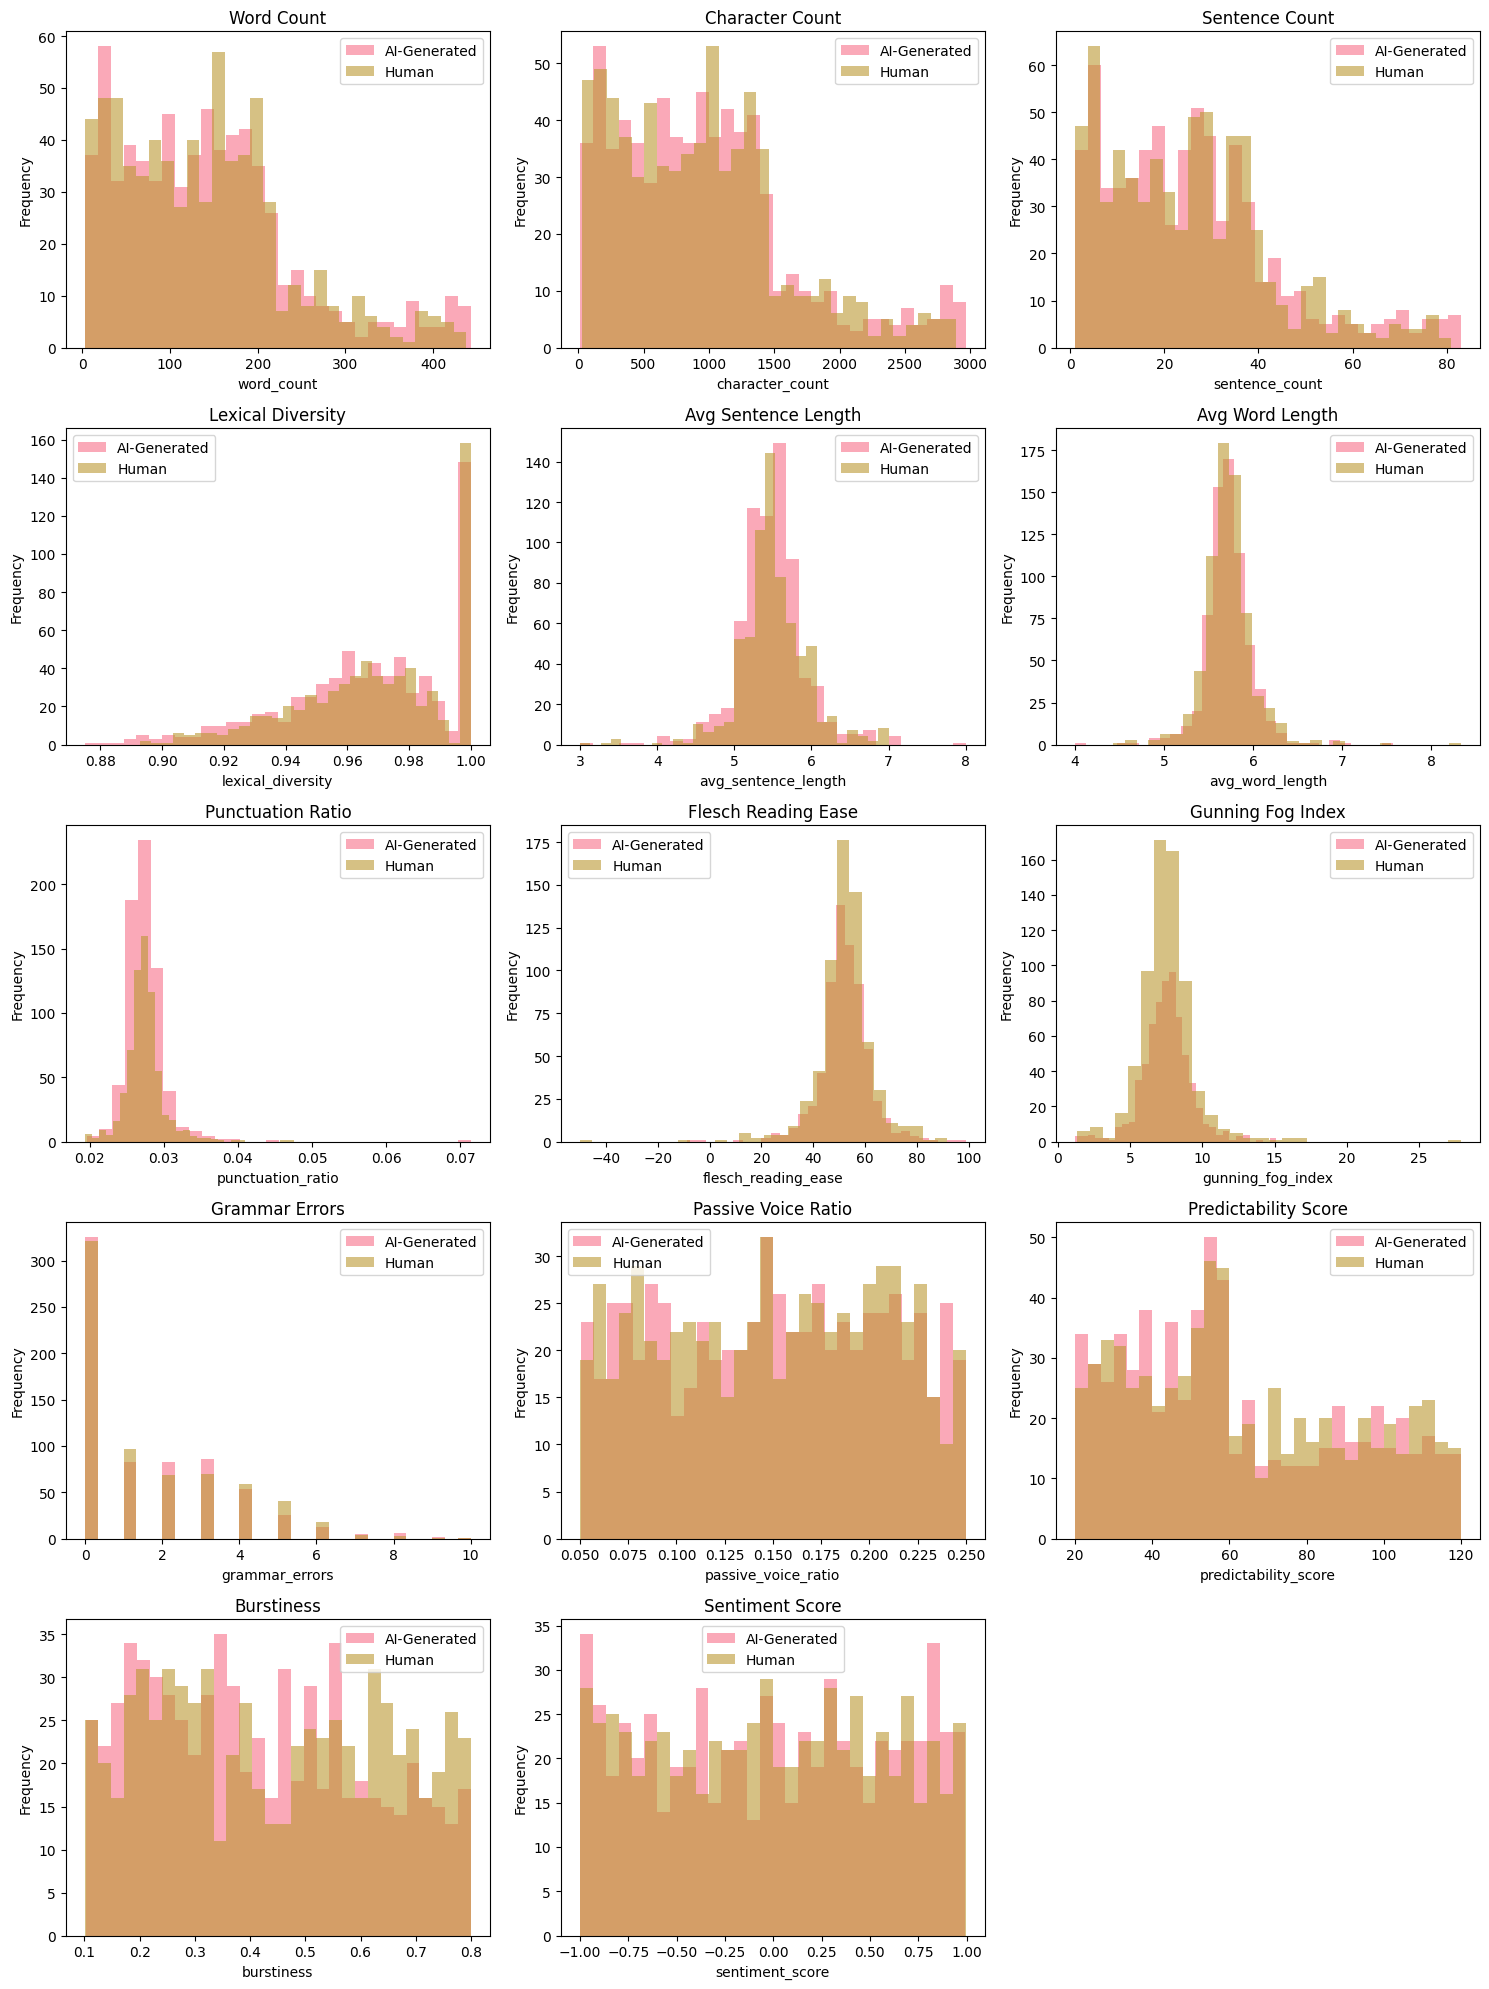

In [9]:
# Analyze linguistic features
print("=== LINGUISTIC FEATURES ANALYSIS ===")

# List of numeric features to analyze
linguistic_features = [
    'word_count', 'character_count', 'sentence_count', 'lexical_diversity',
    'avg_sentence_length', 'avg_word_length', 'punctuation_ratio',
    'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors',
    'passive_voice_ratio', 'predictability_score', 'burstiness', 'sentiment_score'
]

# Statistical comparison by label
print("\nFeature comparison by label (mean values):")
feature_comparison = df.groupby('label')[linguistic_features].mean()
print(feature_comparison.round(3))

# Calculate differences
print("\nDifference (AI - Human):")
if 1 in feature_comparison.index and 0 in feature_comparison.index:
    differences = feature_comparison.loc[1] - feature_comparison.loc[0]
    print(differences.round(3))

# Visualize feature distributions
n_features = len(linguistic_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, feature in enumerate(linguistic_features):
    if i < len(axes):
        for label in df['label'].unique():
            label_name = "Human" if label == 0 else "AI-Generated"
            data = df[df['label'] == label][feature]
            axes[i].hist(data, bins=30, alpha=0.6, label=label_name)
        
        axes[i].set_title(f'{feature.replace("_", " ").title()}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Hide extra subplots
for i in range(len(linguistic_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 8. Feature Correlation Analysis

=== FEATURE CORRELATION ANALYSIS ===


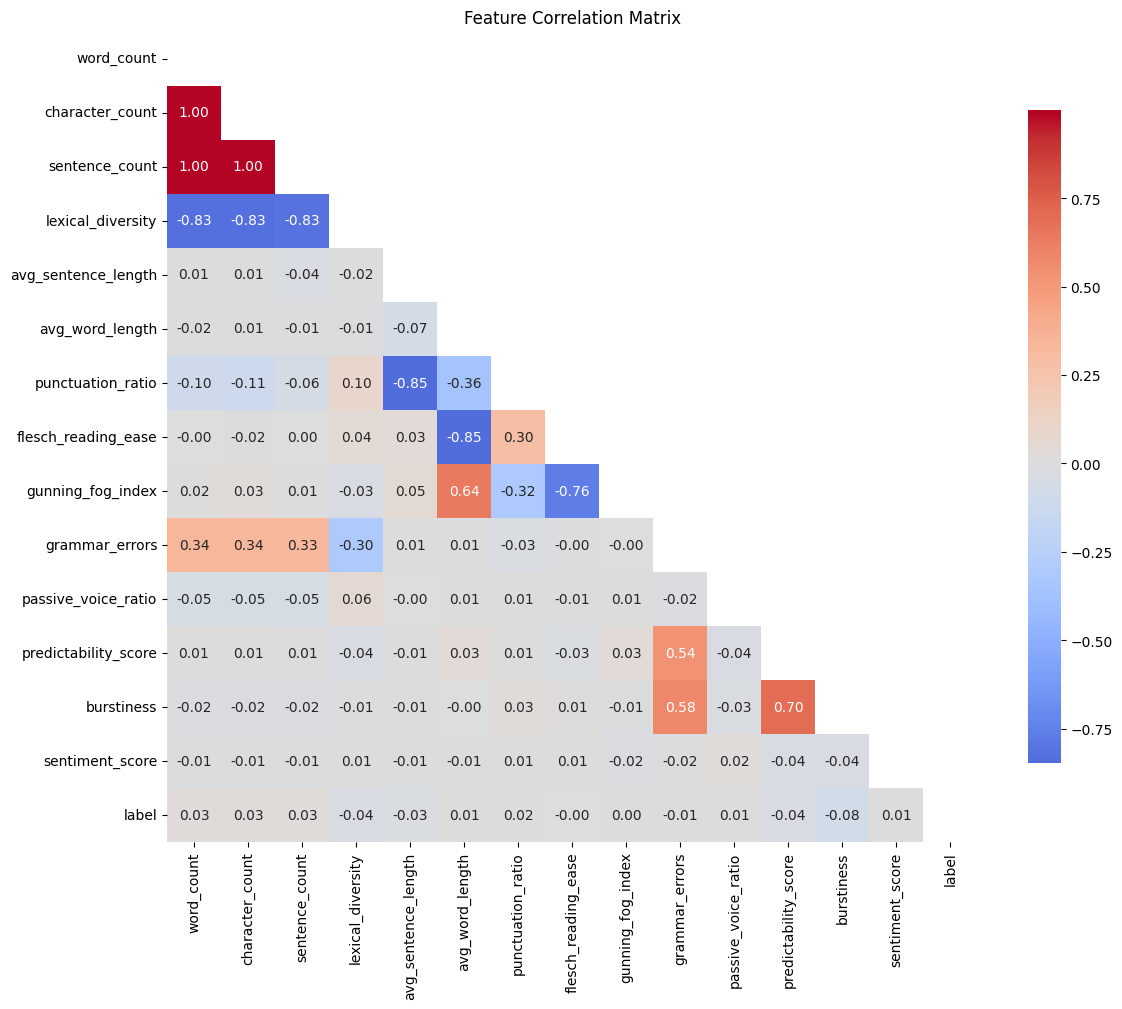


Features most correlated with label:
burstiness              0.077253
lexical_diversity       0.038270
predictability_score    0.037347
sentence_count          0.029760
avg_sentence_length     0.029052
character_count         0.028696
word_count              0.027279
punctuation_ratio       0.016104
sentiment_score         0.013702
avg_word_length         0.012896
grammar_errors          0.010128
passive_voice_ratio     0.007933
gunning_fog_index       0.004251
flesch_reading_ease     0.000029
Name: label, dtype: float64


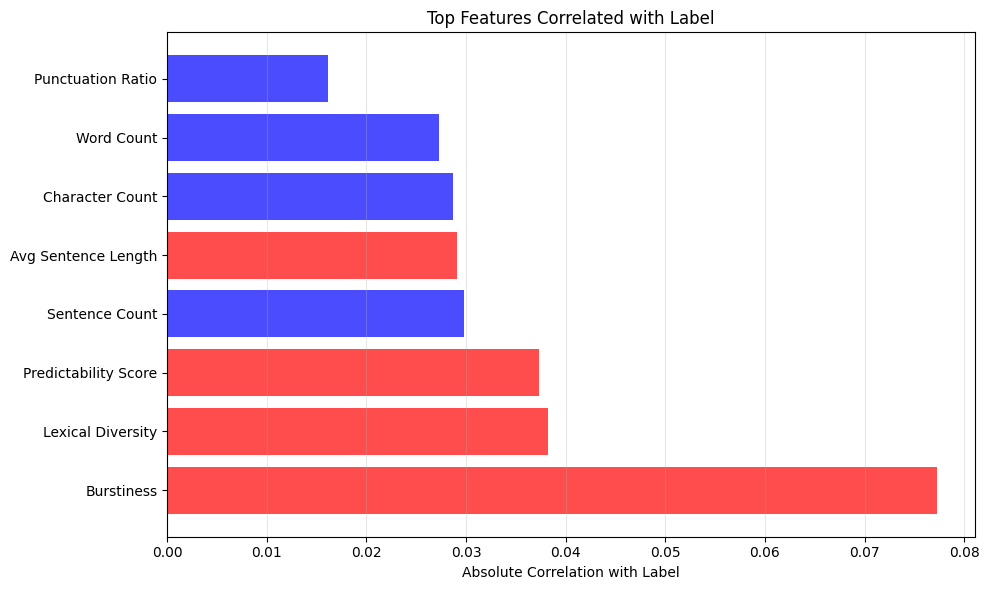

In [10]:
# Correlation analysis
print("=== FEATURE CORRELATION ANALYSIS ===")

# Calculate correlation matrix
corr_features = linguistic_features + ['label']
correlation_matrix = df[corr_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with label
print("\nFeatures most correlated with label:")
label_correlations = correlation_matrix['label'].abs().sort_values(ascending=False)
print(label_correlations[label_correlations.index != 'label'])

# Plot top correlated features
top_features = label_correlations[label_correlations.index != 'label'].head(8)
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in correlation_matrix['label'][top_features.index]]
plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), [f.replace('_', ' ').title() for f in top_features.index])
plt.xlabel('Absolute Correlation with Label')
plt.title('Top Features Correlated with Label')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Sample Text Comparison

In [11]:
# Compare sample texts between AI and human
print("=== SAMPLE TEXT COMPARISON ===")

# Get samples from each class
human_samples = df[df['label'] == 0]['text_content'].head(3)
ai_samples = df[df['label'] == 1]['text_content'].head(3)

print("\n" + "="*60)
print("HUMAN-WRITTEN SAMPLES")
print("="*60)
for i, text in enumerate(human_samples, 1):
    print(f"\nSample {i}:")
    print(text[:500] + ("..." if len(text) > 500 else ""))
    print("-" * 50)

print("\n" + "="*60)
print("AI-GENERATED SAMPLES")
print("="*60)
for i, text in enumerate(ai_samples, 1):
    print(f"\nSample {i}:")
    print(text[:500] + ("..." if len(text) > 500 else ""))
    print("-" * 50)

=== SAMPLE TEXT COMPARISON ===

HUMAN-WRITTEN SAMPLES

Sample 1:
Decide campaign professional such computer nice. Analysis answer change because call article type sea. Respond include policy per today really current.
Effort through plant relationship new book necessary plant. Beautiful occur father cause yet purpose. Great speech rule town.
Marriage hundred near receive. Car science set put matter tax dark.
Son speech although ever can decision up.
Yeah fish establish bad attorney newspaper own. Carry just energy free quite sister prepare. Television police b...
--------------------------------------------------

Sample 2:
Low around drop eye. Another know thought good strong must off same. Should say president their series myself structure.
Party difficult list even expect start. Include that resource evening morning.
Life cover get oil there want.
Score present more interview name sport until. Meet value mind reason why.
--------------------------------------------------

Sample 3:
H

## 10. Feature Importance for Classification

=== FEATURE IMPORTANCE ANALYSIS ===

Feature Importance (Random Forest):
                 feature  importance
12            burstiness    0.094228
10   passive_voice_ratio    0.086414
11  predictability_score    0.083208
13       sentiment_score    0.082220
8      gunning_fog_index    0.079364
7    flesch_reading_ease    0.078380
5        avg_word_length    0.073646
4    avg_sentence_length    0.072067
1        character_count    0.070048
6      punctuation_ratio    0.069245
0             word_count    0.065857
3      lexical_diversity    0.065122
2         sentence_count    0.049691
9         grammar_errors    0.030511

Feature Importance (Random Forest):
                 feature  importance
12            burstiness    0.094228
10   passive_voice_ratio    0.086414
11  predictability_score    0.083208
13       sentiment_score    0.082220
8      gunning_fog_index    0.079364
7    flesch_reading_ease    0.078380
5        avg_word_length    0.073646
4    avg_sentence_length    0.072067
1 

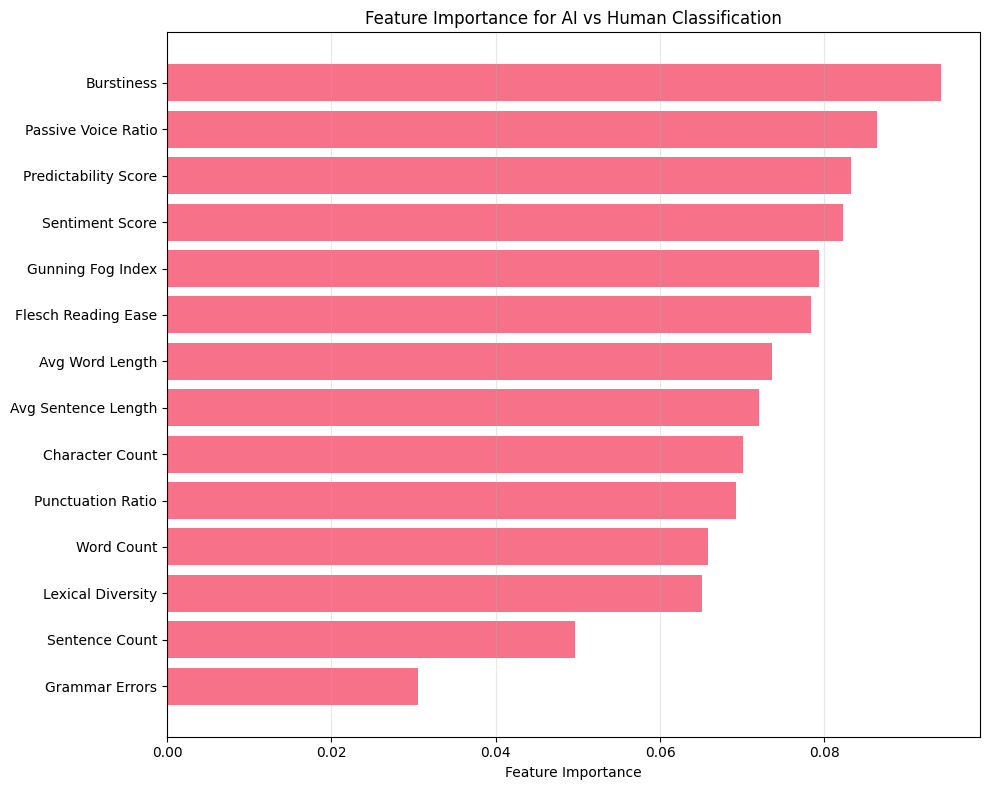

In [12]:
# Quick feature importance analysis using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

print("=== FEATURE IMPORTANCE ANALYSIS ===")

# Prepare data - make sure linguistic_features is defined
linguistic_features = [
    'word_count', 'character_count', 'sentence_count', 'lexical_diversity',
    'avg_sentence_length', 'avg_word_length', 'punctuation_ratio',
    'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors',
    'passive_voice_ratio', 'predictability_score', 'burstiness', 'sentiment_score'
]

X = df[linguistic_features].fillna(0)
y = df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': linguistic_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), 
           [f.replace('_', ' ').title() for f in feature_importance['feature']])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for AI vs Human Classification')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Summary and Insights

In [13]:
# Make sure all variables are defined for the summary
linguistic_features = [
    'word_count', 'character_count', 'sentence_count', 'lexical_diversity',
    'avg_sentence_length', 'avg_word_length', 'punctuation_ratio',
    'flesch_reading_ease', 'gunning_fog_index', 'grammar_errors',
    'passive_voice_ratio', 'predictability_score', 'burstiness', 'sentiment_score'
]

# Recalculate key variables if needed
if 'label_percentages' not in locals():
    label_percentages = df['label'].value_counts(normalize=True).sort_index() * 100

if 'balance_ratio' not in locals():
    label_counts = df['label'].value_counts().sort_index()
    balance_ratio = min(label_counts) / max(label_counts)

if 'top_features' not in locals():
    # Calculate correlation with label
    corr_features = linguistic_features + ['label']
    correlation_matrix = df[corr_features].corr()
    label_correlations = correlation_matrix['label'].abs().sort_values(ascending=False)
    top_features = label_correlations[label_correlations.index != 'label'].head(8)

if 'feature_importance' not in locals():
    # Quick feature importance calculation for summary
    from sklearn.ensemble import RandomForestClassifier
    X = df[linguistic_features].fillna(0)
    y = df['label']
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    feature_importance = pd.DataFrame({
        'feature': linguistic_features,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)

print("=== DATASET SUMMARY AND INSIGHTS ===")
print(f"""    
üìä DATASET OVERVIEW:
‚Ä¢ Total samples: {len(df):,}
‚Ä¢ Features: {len(linguistic_features)} linguistic features + text content
‚Ä¢ Target: Binary classification (Human=0, AI=1)
‚Ä¢ Balance: {label_percentages[0]:.1f}% Human, {label_percentages[1]:.1f}% AI

üìà KEY FINDINGS:
‚Ä¢ Most discriminative features: {', '.join(top_features.head(3).index)}
‚Ä¢ Average text length: {df['text_length'].mean():.0f} characters
‚Ä¢ Text length range: {df['text_length'].min()} - {df['text_length'].max()} characters

üîç INSIGHTS FOR MODELING:
‚Ä¢ Dataset appears well-balanced for binary classification
‚Ä¢ Multiple linguistic features show correlation with AI/Human labels
‚Ä¢ Text length and complexity metrics may be strong predictors
‚Ä¢ Ready for feature engineering and model training

‚úÖ NEXT STEPS:
1. Feature engineering and selection
2. Train baseline models (Logistic Regression, Random Forest)
3. Experiment with advanced models (BERT, transformers)
4. Cross-validation and hyperparameter tuning
5. Model interpretation and error analysis
""")

# Save key statistics
summary_stats = {
    'total_samples': len(df),
    'human_samples': len(df[df['label'] == 0]),
    'ai_samples': len(df[df['label'] == 1]),
    'balance_ratio': balance_ratio,
    'avg_text_length': df['text_length'].mean(),
    'top_correlated_features': top_features.head(5).index.tolist(),
    'most_important_features': feature_importance.head(5)['feature'].tolist()
}

print("\nüìÅ Summary statistics saved for future reference.")

=== DATASET SUMMARY AND INSIGHTS ===
    
üìä DATASET OVERVIEW:
‚Ä¢ Total samples: 1,367
‚Ä¢ Features: 14 linguistic features + text content
‚Ä¢ Target: Binary classification (Human=0, AI=1)
‚Ä¢ Balance: 50.0% Human, 50.0% AI

üìà KEY FINDINGS:
‚Ä¢ Most discriminative features: burstiness, lexical_diversity, predictability_score
‚Ä¢ Average text length: 940 characters
‚Ä¢ Text length range: 14 - 2966 characters

üîç INSIGHTS FOR MODELING:
‚Ä¢ Dataset appears well-balanced for binary classification
‚Ä¢ Multiple linguistic features show correlation with AI/Human labels
‚Ä¢ Text length and complexity metrics may be strong predictors
‚Ä¢ Ready for feature engineering and model training

‚úÖ NEXT STEPS:
1. Feature engineering and selection
2. Train baseline models (Logistic Regression, Random Forest)
3. Experiment with advanced models (BERT, transformers)
4. Cross-validation and hyperparameter tuning
5. Model interpretation and error analysis


üìÅ Summary statistics saved for future re